# Analysis and Visualisation

## Dataset - WeRateDogs&trade; Twitter Archive - Cleaned

***By: Kartik Nanduri***<br>
**Date: 1st Dec, 2018.**

In [1]:
# importing all the necessary libraries/packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Importing data**

In [2]:
# reading file twitter_archive_master.csv
twitter = pd.read_csv('dataset/twitter_archive_master.csv', encoding = 'utf-8')
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 14 columns):
tweet_id              1685 non-null int64
tweet_date            1685 non-null object
tweet_source          1685 non-null object
tweet                 1685 non-null object
tweet_urls            1685 non-null object
rating_numerator      1685 non-null int64
rating_denominator    1685 non-null int64
image_url             1685 non-null object
tweet_favorites       1685 non-null int64
tweet_retweets        1685 non-null int64
dog_class             1685 non-null object
dog_names             1685 non-null object
dog_breeds            1685 non-null object
accuracy              1685 non-null float64
dtypes: float64(1), int64(5), object(8)
memory usage: 184.4+ KB


In [3]:
# convert the columns into appropriate types
twitter['tweet_id'] = twitter['tweet_id'].astype(object)
twitter['tweet_date'] = pd.to_datetime(twitter.tweet_date)
twitter['tweet_source'] = twitter['tweet_source'].astype('category')
twitter['dog_class'] = twitter['dog_class'].astype('category')

**Looking at the rating system employeed by WeRateDogs&trade;**

In [4]:
# describing our dataset
twitter.describe()

rating_numerator  rating_denominator  tweet_favorites  tweet_retweets  \
count       1685.000000         1685.000000      1685.000000     1685.000000   
mean          10.862315            9.994065      9097.383976     2715.596439   
std            1.871155            0.243613     13309.640452     4911.022945   
min            0.000000            0.000000        80.000000       12.000000   
25%           10.000000           10.000000      2067.000000      609.000000   
50%           11.000000           10.000000      4263.000000     1354.000000   
75%           12.000000           10.000000     11225.000000     3072.000000   
max           31.000000           10.000000    164815.000000    83990.000000   

          accuracy  
count  1685.000000  
mean      0.549905  
std       0.299357  
min       0.000010  
25%       0.302685  
50%       0.550506  
75%       0.822048  
max       0.999956

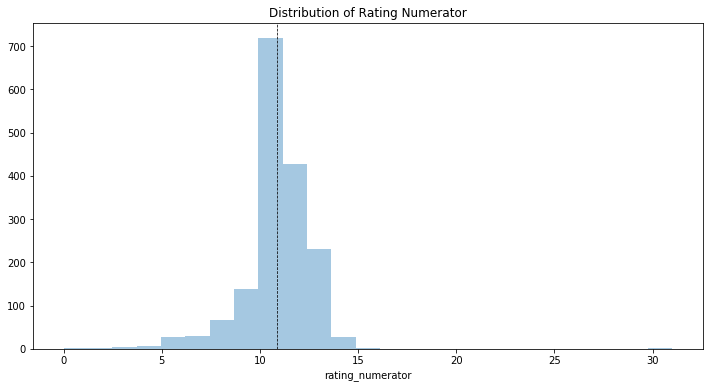

In [5]:
# plotitng the distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(twitter['rating_numerator'], kde=False, bins = 25)
plt.title('Distribution of Rating Numerator')
plt.axvline(twitter.rating_numerator.mean(), color='black', linestyle="dashed", linewidth=0.75);

**Notes:**
- from the above statistics and distribution plot, we can confirm that on an average a dog gets a rating of 10, an interesting observation is that, the rating system employeed is unique, that is when we actually divide larger ratings with their denominators, the result all ways falls in the range of 0 - 20 with final denominator being the number 10.
- The are exceptions where in the large ratings are given 420 and 1776, these were scaled in the cleaning step. Thus, in this case we have a rating 31 as the maximum rating.

**Are Favorites and Retweets related?**

In [6]:
# printing the correlation between the two
twitter.tweet_favorites.corr(twitter.tweet_retweets)

0.9316179040758671

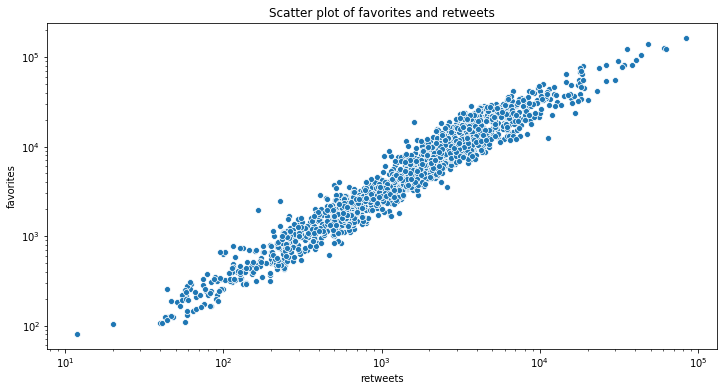

In [7]:
# plotting the same
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x = 'tweet_retweets', y = 'tweet_favorites',
           data = twitter)
plt.title('Scatter plot of favorites and retweets')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('retweets')
plt.ylabel('favorites');

**Notes:**
- There is a strong positive correlation between the two, more favorites, more retweets or vice versa.

**When did WeRateDogs&trade; gain attention?**

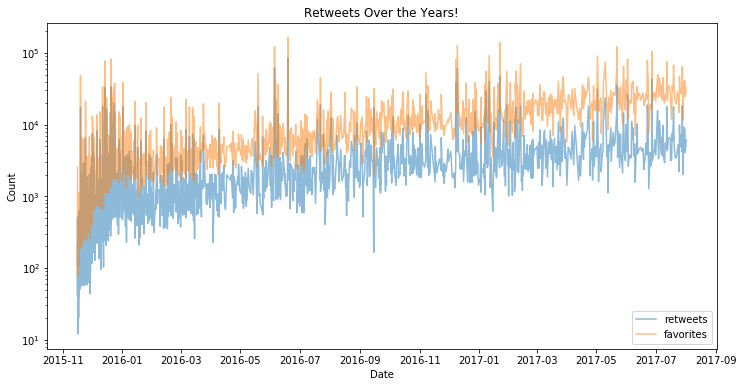

In [8]:
# plotting a time-series
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='tweet_date', y = 'tweet_retweets',
            data = twitter, label='retweets', alpha = 0.5)
sns.lineplot(x='tweet_date', y = 'tweet_favorites',
            data = twitter, label='favorites', alpha = 0.5)
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Date')
plt.title('Retweets Over the Years!')
plt.legend();

**Notes:**
- from the above graph we can see that, WeRateDogs&trade; has had a steady growth and is doing great.
- and also we can see that, the the growth starts somewhere near in the between end of 2015 and start of 2016.

**Is there is a change in rating system?**

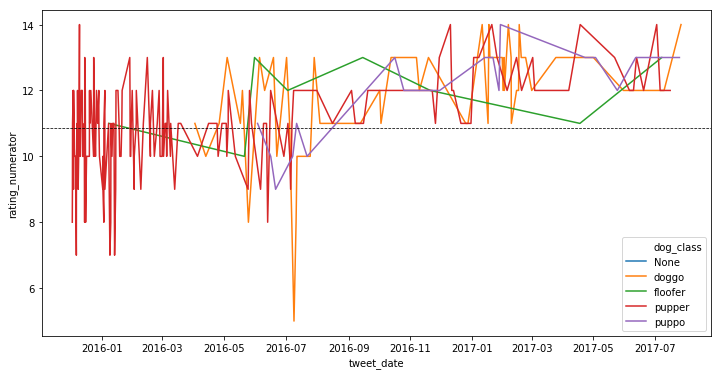

In [9]:
# plotting ratings over years
dog_class = twitter[(twitter['dog_class'] != 'None')]
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x = 'tweet_date', y = 'rating_numerator',
               data = dog_class, hue = 'dog_class')
plt.axhline(twitter.rating_numerator.mean(), color='black', linestyle="dashed", linewidth=0.75);

**Notes:**
- We can confirm that on an average dogs are rated to be above 10, and as per the above the statistics **75%** of our dataset has a rating of **12/10**.
- An interesting thing is that all classes after **August 2016**, fall above our mean rating of **10.89**.
- Thus, we can confirm that there has been a change in the rating system. And I think, the WeRateDogs&trade; team can thank [Brent](https://mashable.com/article/theyre-good-dogs-brent-meme-update/#cU.ZtPn9Pqq9) for making this a propular.

**WeRateDogs'&trade; favorite dog breed?**

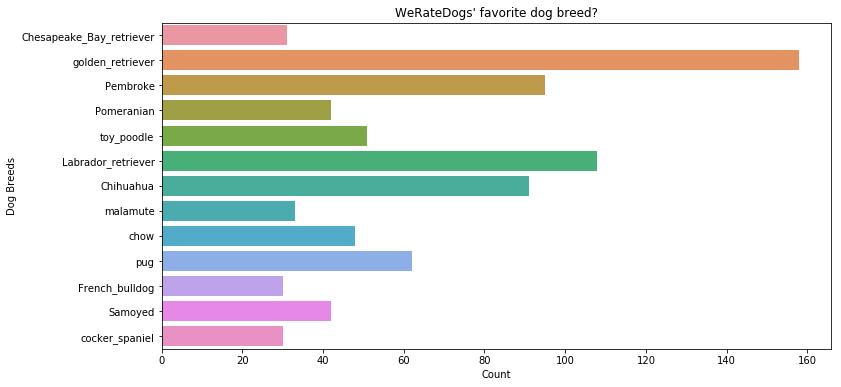

In [10]:
# plotting top 13 breeds that are frequently sent.
dog_breed = twitter.groupby('dog_breeds').filter(lambda x: len(x) >= 30)

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y= 'dog_breeds', data = dog_breed)
plt.ylabel('Dog Breeds')
plt.xlabel('Count')
plt.title('WeRateDogs\' favorite dog breed?');

**Notes:**
- Okay, WeRateDogs&trade; get more of Golden Retrievers followed by Labrador Retrievers.

**WeRateDogs'&trade; rate which class the most?**

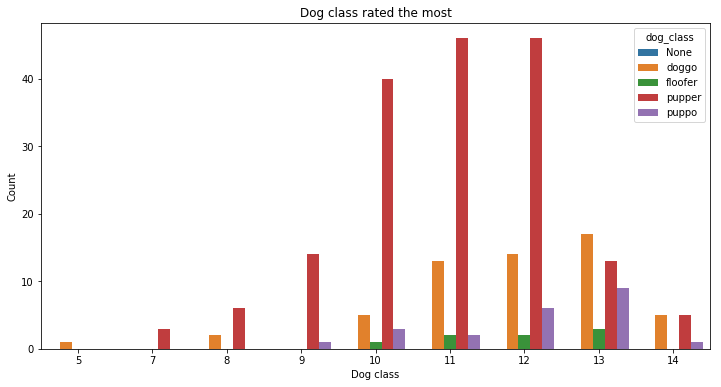

In [11]:
# plotting a barplot to see which dog class is most rated.
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'rating_numerator', hue = 'dog_class',
           data = dog_class)
plt.xlabel('Dog class')
plt.ylabel('Count')
plt.title('Dog class rated the most');

**Notes:**
- Yay! pupper wins the race.

## Conclusion

***If you have a dog, just take a pic with your dog, and send it over to WeRateDogs&trade; ([@dog_rates](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor)); and let the world know, how you and your best friend get along. And importantly make your dog famous and as per this [tweet](https://twitter.com/dog_rates/status/1059626008834392064) <span style="color: red">VOTE</span> to help <span style="color: green">Coconut</span> with her mission!!!!!***